In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config IPython.matplotlib.backend = "retina"
import numpy as np
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [3]:
import numpy as np
from numpy.linalg import lstsq

In [4]:
x = np.linspace(-3, 3, 10)
yerr = np.random.poisson(size=len(x))
y = np.exp(-x ** 2) + yerr

Text(0,0.5,'y')

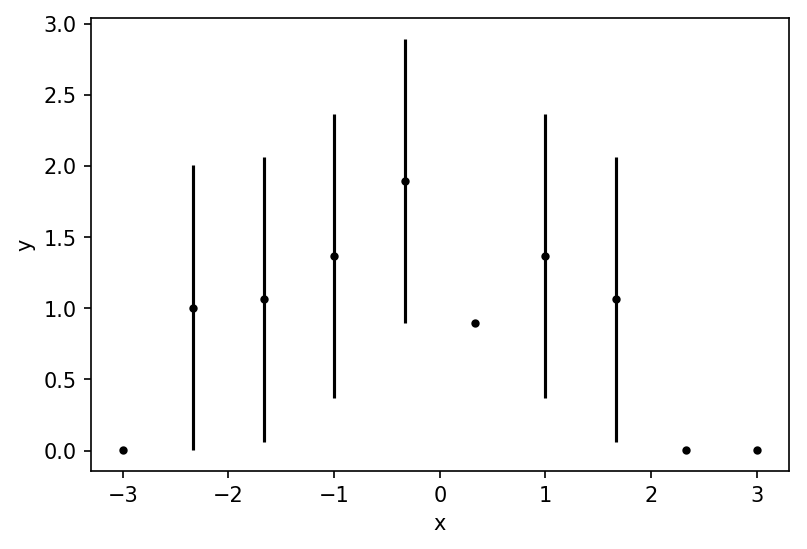

In [5]:
plt.errorbar(x, y, yerr=yerr, fmt='k.')
plt.xlabel("x")
plt.ylabel("y")

In [6]:
def parabola(x, coeffs):
    return np.dot(np.vander(x, N=3), np.asarray(coeffs).T)

In [7]:
def center_estimate_1d(x, y):
    i = np.argmax(y)
    x_ = np.array([x[i-1], x[i], x[i+1]])
    y_ = np.array([y[i-1], y[i], y[i+1]])
    design_matrix = np.vander(x_, N=3)
    a, b, c = lstsq(design_matrix, y_)[0]
    return ((a, b, c), - .5 * b / a)

In [8]:
def method_of_moments_1d(x, y):
    return (np.sum(x * y) / np.sum(y))

In [9]:
coeffs, center = center_estimate_1d(x, y)

In [10]:
center

-0.43659737056677111

In [11]:
center_mom = method_of_moments_1d(x, y)

In [12]:
center_mom

-0.30797619555677602

In [13]:
x_fine = np.linspace(-3, 3, 100)
p = parabola(x_fine, coeffs)

Text(0,0.5,'y')

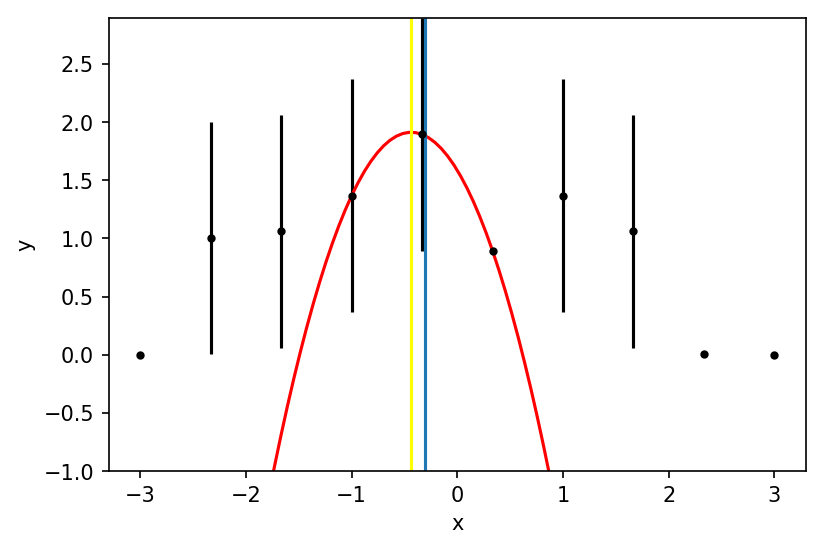

In [14]:
plt.errorbar(x, y, yerr=yerr, fmt='k.')
plt.plot(x_fine, p, 'r-')
plt.axvline(center_mom)
plt.axvline(center, color = 'yellow')
plt.ylim(-1 + np.min(y), 1 + np.max(y))
plt.xlabel("x")
plt.ylabel("y")

In [181]:
u = np.linspace(0, 8, 9)
x, y = np.meshgrid(u, u)
zerr = np.random.poisson(lam = 1, size=len(u) ** 2).reshape((len(u), len(u)))
true_center = [2, 6]
z = 100 - (x - true_center[1]) ** 2 - (y - true_center[0]) ** 2 + zerr

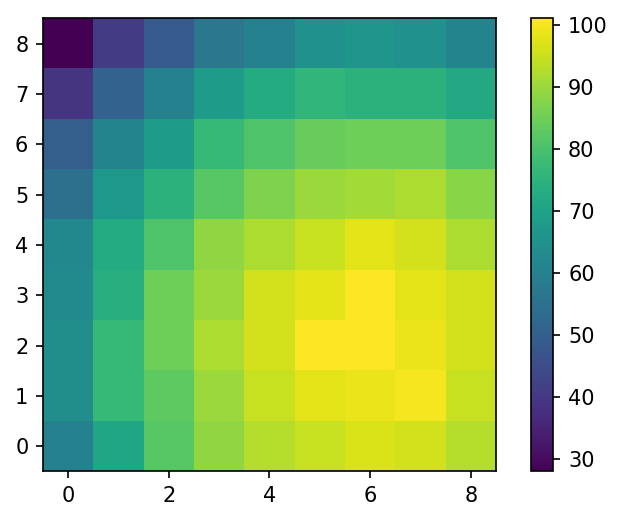

In [182]:
plt.imshow(z, origin='lower')
plt.colorbar()

In [183]:
def parabola_2d(x, y, coeffs):
    a, b, c, d, e, f = coeffs
    return a + b * x + c * y + d * x ** 2 + e * x * y + f * y ** 2

In [184]:
def center_estimate_2d(z):
    arg_z_max = np.argmax(z)
    i, j = np.unravel_index(arg_z_max, z.shape)
    z_ = z[i-1:i+2, j-1:j+2]

    a = (-z_[0,0] + 2*z_[0,1] - z_[0,2] + 2*z_[1,0] + 5*z_[1,1] + 2*z_[1,2] - z_[2,0] + 2*z_[2,1] - z_[2,2])/9
    b = (-z_[0,0] - z_[0,1] - z_[0,2] + z_[2,0] + z_[2,1] + z_[2,2])/6
    c = (-z_[0,0] + z_[0,2] - z_[1,0] + z_[1,2] - z_[2,0] + z_[2,2])/6
    d = (z_[0,0] + z_[0,1] + z_[0,2] - z_[1,0]*2 - z_[1,1]*2 - z_[1,2]*2 + z_[2,0] + z_[2,1] + z_[2,2])/6
    e = (z_[0,0] - z_[0,2] - z_[2,0] + z_[2,2]) * .25
    f = (z_[0,0] - 2 * z_[0,1] + z_[0,2] + z_[1,0] - 2 * z_[1,1] + z_[1,2] + z_[2,0] - 2 * z_[2,1] + z_[2,2]) / 6
    
    det = 4 * d * f - e ** 2
    xm = - (2 * f * b - c * e) / det
    ym = - (2 * d * c - b * e) / det
    return((a, b, c, d, e, f),
           (i+xm, j+ym))

In [206]:
coeffs, quad_center = center_estimate_2d(z)

In [207]:
quad_center

(2.2666666666666666, 6.2000000000000002)

In [208]:
def method_of_moments_2d(x, y, z):
    sum_z = np.sum(z)
    return(np.sum(y*z)/sum_z, np.sum(x*z)/sum_z)

In [209]:
center_mom = method_of_moments_2d(x, y, z)

In [210]:
center_mom

(3.6705444392740811, 4.3344191096634095)

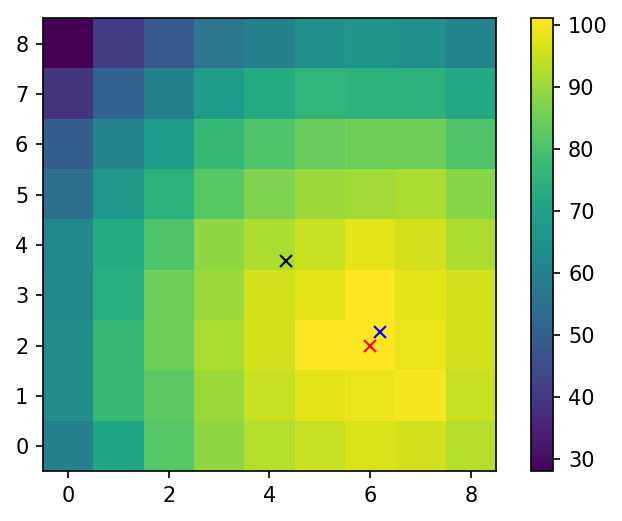

In [213]:
plt.imshow(z, origin='lower')
plt.colorbar()
plt.plot(true_center[1], true_center[0], 'xr')
plt.plot(quad_center[1], quad_center[0], 'xb')
plt.plot(center_mom[1], center_mom[0], 'xk')